`rites` is a collection of IPython magics for creating computable essays.

In [1]:
    %load_ext rites

# Markdown Mode

In [2]:
    %rites markdown 

In [3]:
---
With `rites.markdown`, code cells accept markdown.  Any indented code blocks are executed.

    foo = 42
    print(f"foo is {foo}")

> Accepting the `rites.markdown` convetion means the author agrees to indent all their code at least once; and sometimes more in nested lists. 

---

---
With `rites.markdown`, code cells accept markdown.  Any indented code blocks are executed.

    foo = 42
    print(f"foo is {foo}")

> Accepting the `rites.markdown` convetion means the author agrees to indent all their code at least once; and sometimes more in nested lists. 

---

foo is 42


# Template Mode

With templates real data can be inserted into the computational essay. An author should desire their notebook restart and run all during template mode.

In [4]:
    
    %rites template
Skipping the first line suppresses the markdown output.

In [5]:
---
In template mode, `jinja2` may be invoked to template markdown and code.  We already know that `foo` is 42, but can test that assertion with

    assert foo is {{foo}} is 42
    {% for i in range(3) %}print({{i}})
    {% endfor %}
---

---
In template mode, `jinja2` may be invoked to template markdown and code.  We already know that `foo` is 42, but can test that assertion with

    assert foo is 42 is 42
    print(0)
    print(1)
    print(2)
    
---

0
1
2


In [6]:
# Turning off magics

    %rites --off template markdown

# Turning off magics

    %rites --off template markdown

# Test Mode

In [7]:
    %rites test

In testing mode, function definitions and class definitions are tested interactively.

In [8]:
## A Function with no parameters is tested

In [9]:
    def f(): 
        assert True

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


Function with definitions are inferred as [__hypothesis__]() strategies.  This approach promotes better annotations habits.

In [10]:
    ct = 0
    def f(x: int): 
        global ct
        ct += 1
        
    def test():
        global ct
        assert ct > 0

F.
FAIL: unittest.case.FunctionTestCase (test)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-10-57e7bfe64edb>", line 8, in test
    assert ct > 0
AssertionError

----------------------------------------------------------------------
Ran 2 tests in 0.210s

FAILED (failures=1)


In [11]:
# Extra conventions

In [22]:
    %rites conventions --off test

## Yaml

Start code with `---`

In [23]:
    ---
    a: 42

In [24]:
assert a == 42

## Graphviz

Start code with `graph` or `digraph`

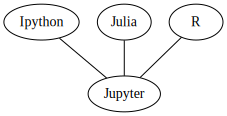

In [25]:
    graph {{Ipython Julia R}--Jupyter}

# Notebooks as source

Rites uses notebooks as source; line numbers are retained so that the notebook source produces semi-sane tracebacks.

In [16]:
    %rites --off conventions
    from rites import markdown, template, conventions

The rites loader allows an author to import notebooks directly as source.  This means all of the rites documents are importable.

In [17]:
    import readme

The rites extension is already loaded. To reload it, use:
  %reload_ext rites
foo is 42
0
1
2
[NbConvertApp] Converting notebook readme.ipynb to markdown
[NbConvertApp] Writing 4407 bytes to readme.md


In [18]:
    assert all(file.__file__.endswith('.ipynb') for file in (markdown, template, conventions))

#### Everything Should Compute

Convert a document into other formats; Restart, Run All, `nbconvert`.

In [19]:
%%rites markdown template test
Use rites a cell magic to temporarily employ any convetions.
    
    if __name__ == '__main__':
        !jupyter nbconvert --to markdown readme.ipynb

Use rites a cell magic to temporarily employ any convetions.
    
    if __name__ == '__main__':
        !jupyter nbconvert --to markdown readme.ipynb

[NbConvertApp] Converting notebook readme.ipynb to markdown
[NbConvertApp] Writing 4407 bytes to readme.md


...
----------------------------------------------------------------------
Ran 3 tests in 0.145s

OK
